In [ ]:
from tensorflow.keras.applications import VGG16, VGG19, InceptionV3, ResNet50,DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import tensorflow as tf

In [ ]:
def create_model(base_model, img_size=(224, 224), num_classes=1):
    # Add new classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    predictions = Dense(num_classes, activation='sigmoid')(x)

    # Combine base model with new classification layers
    model = Model(inputs=base_model.input, outputs=predictions)

    # Freeze layers of the pre-trained model
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Define a function to train the model
def train_model(model, train_generator, validation_generator, epochs=10):
    history = model.fit(
        train_generator,
        steps_per_epoch=train_generator.samples // batch_size,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_generator.samples // batch_size
    )
    return history

# Function to load a saved model
def load_saved_model(model_path):
    model = tf.keras.models.load_model(model_path)
    return model

# Example usage:

# Define your dataset directory paths
train_dir = '/content/drive/MyDrive/spam image datset/ish dataset/train'
validation_dir = '/content/drive/MyDrive/spam image datset/ish dataset/val'

# Define image size and batch size
img_size = (224, 224)
batch_size = 32

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 1235 images belonging to 2 classes.
Found 359 images belonging to 2 classes.


In [ ]:
base_model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_vgg16 = create_model(base_model_vgg16)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
history_vgg16 = train_model(model_vgg16, train_generator, validation_generator)

Epoch 1/10
38/38 [==============================] - 248s 6s/step - loss: 0.2275 - accuracy: 0.9302 - val_loss: 0.0736 - val_accuracy: 0.9830
Epoch 2/10
38/38 [==============================] - 20s 532ms/step - loss: 0.0810 - accuracy: 0.9792 - val_loss: 0.0560 - val_accuracy: 0.9886
Epoch 3/10
38/38 [==============================] - 21s 554ms/step - loss: 0.0761 - accuracy: 0.9817 - val_loss: 0.0534 - val_accuracy: 0.9915
Epoch 4/10
38/38 [==============================] - 21s 557ms/step - loss: 0.0688 - accuracy: 0.9817 - val_loss: 0.0483 - val_accuracy: 0.9915
Epoch 5/10
38/38 [==============================] - 21s 560ms/step - loss: 0.0621 - accuracy: 0.9850 - val_loss: 0.0462 - val_accuracy: 0.9830
Epoch 6/10
38/38 [==============================] - 21s 551ms/step - loss: 0.0556 - accuracy: 0.9859 - val_loss: 0.0480 - val_accuracy: 0.9830
Epoch 7/10
38/38 [==============================] - 22s 565ms/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0435 - val_accuracy: 0.9915
E

In [ ]:
import matplotlib.pyplot as plt

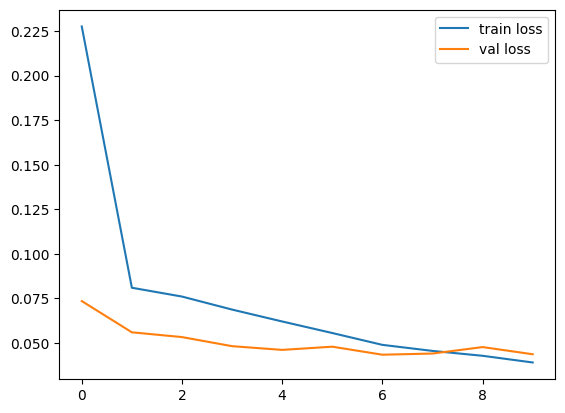

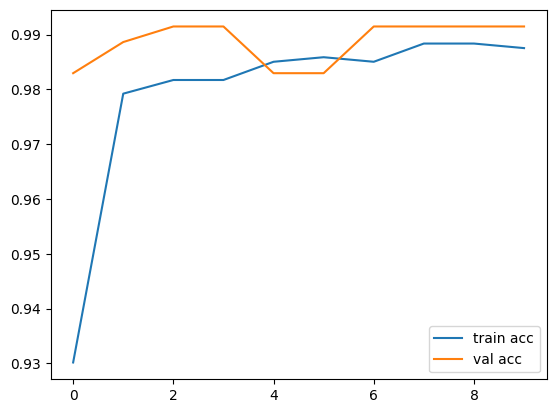

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot the loss
plt.plot(history_vgg16.history['loss'], label='train loss')
plt.plot(history_vgg16.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history_vgg16.history['accuracy'], label='train acc')
plt.plot(history_vgg16.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_vgg19 = create_model(base_model_vgg19)

In [ ]:
history_vgg19 = train_model(model_vgg19, train_generator, validation_generator)

Epoch 1/10
38/38 [==============================] - 23s 577ms/step - loss: 0.2296 - accuracy: 0.9476 - val_loss: 0.0799 - val_accuracy: 0.9830
Epoch 2/10
38/38 [==============================] - 21s 546ms/step - loss: 0.0806 - accuracy: 0.9784 - val_loss: 0.0644 - val_accuracy: 0.9801
Epoch 3/10
38/38 [==============================] - 21s 560ms/step - loss: 0.0733 - accuracy: 0.9800 - val_loss: 0.0596 - val_accuracy: 0.9858
Epoch 4/10
38/38 [==============================] - 21s 553ms/step - loss: 0.0697 - accuracy: 0.9800 - val_loss: 0.0574 - val_accuracy: 0.9830
Epoch 5/10
38/38 [==============================] - 21s 540ms/step - loss: 0.0639 - accuracy: 0.9792 - val_loss: 0.0546 - val_accuracy: 0.9830
Epoch 6/10
38/38 [==============================] - 22s 592ms/step - loss: 0.0509 - accuracy: 0.9850 - val_loss: 0.0517 - val_accuracy: 0.9830
Epoch 7/10
38/38 [==============================] - 22s 565ms/step - loss: 0.0503 - accuracy: 0.9859 - val_loss: 0.0465 - val_accuracy: 0.9858

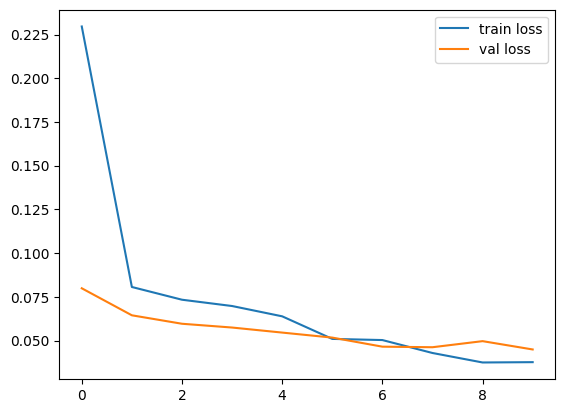

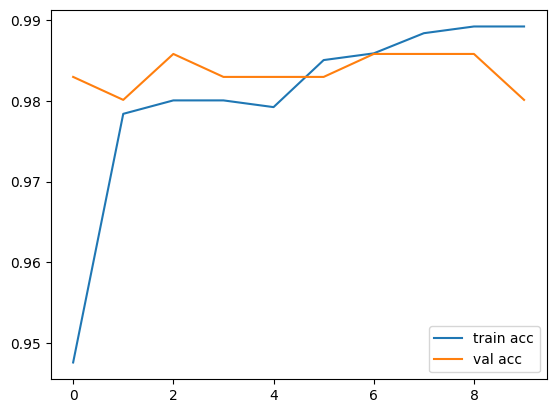

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_vgg19.history['loss'], label='train loss')
plt.plot(history_vgg19.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history_vgg19.history['accuracy'], label='train acc')
plt.plot(history_vgg19.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
base_model_resnet50 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_resnet50 = create_model(base_model_resnet50)

94765736/94765736 [==============================] - 2s 0us/step


In [ ]:
history_resnet50 = train_model(model_resnet50, train_generator, validation_generator)

Epoch 1/10
38/38 [==============================] - 28s 574ms/step - loss: 0.6245 - accuracy: 0.6417 - val_loss: 0.4665 - val_accuracy: 0.7727
Epoch 2/10
38/38 [==============================] - 19s 511ms/step - loss: 0.3939 - accuracy: 0.8795 - val_loss: 0.3475 - val_accuracy: 0.8523
Epoch 3/10
38/38 [==============================] - 21s 557ms/step - loss: 0.3067 - accuracy: 0.9144 - val_loss: 0.2943 - val_accuracy: 0.8892
Epoch 4/10
38/38 [==============================] - 20s 511ms/step - loss: 0.2576 - accuracy: 0.9385 - val_loss: 0.2773 - val_accuracy: 0.8977
Epoch 5/10
38/38 [==============================] - 19s 509ms/step - loss: 0.2327 - accuracy: 0.9435 - val_loss: 0.2516 - val_accuracy: 0.9119
Epoch 6/10
38/38 [==============================] - 21s 556ms/step - loss: 0.2204 - accuracy: 0.9435 - val_loss: 0.2383 - val_accuracy: 0.9205
Epoch 7/10
38/38 [==============================] - 21s 550ms/step - loss: 0.2011 - accuracy: 0.9559 - val_loss: 0.2769 - val_accuracy: 0.8722

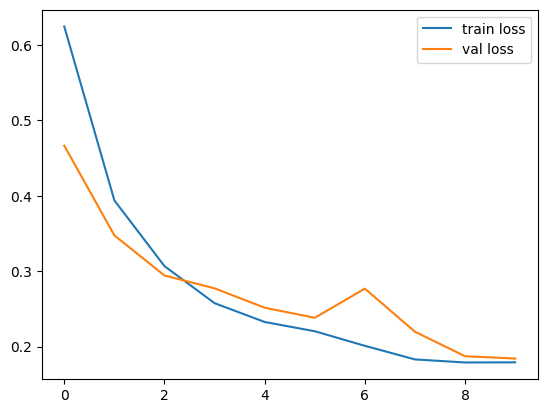

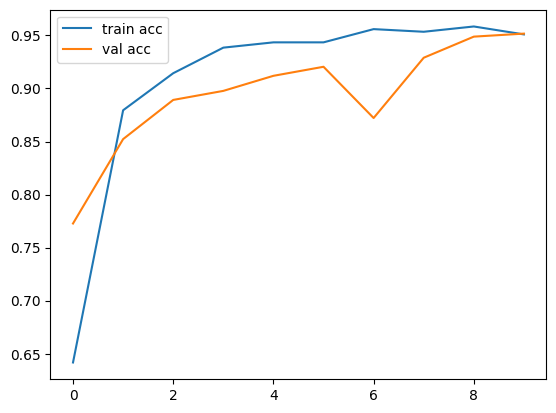

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_resnet50.history['loss'], label='train loss')
plt.plot(history_resnet50.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history_resnet50.history['accuracy'], label='train acc')
plt.plot(history_resnet50.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
base_model_inceptionv3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_inceptionv3 = create_model(base_model_inceptionv3)

In [ ]:
history_inceptionv3 = train_model(model_inceptionv3, train_generator, validation_generator)

Epoch 1/10
38/38 [==============================] - 27s 584ms/step - loss: 0.1338 - accuracy: 0.9634 - val_loss: 0.0894 - val_accuracy: 0.9744
Epoch 2/10
38/38 [==============================] - 20s 515ms/step - loss: 0.0388 - accuracy: 0.9892 - val_loss: 0.0723 - val_accuracy: 0.9773
Epoch 3/10
38/38 [==============================] - 20s 538ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.0781 - val_accuracy: 0.9773
Epoch 4/10
38/38 [==============================] - 20s 527ms/step - loss: 0.0155 - accuracy: 0.9942 - val_loss: 0.0839 - val_accuracy: 0.9801
Epoch 5/10
38/38 [==============================] - 19s 508ms/step - loss: 0.0138 - accuracy: 0.9950 - val_loss: 0.0701 - val_accuracy: 0.9801
Epoch 6/10
38/38 [==============================] - 20s 534ms/step - loss: 0.0098 - accuracy: 0.9967 - val_loss: 0.0962 - val_accuracy: 0.9801
Epoch 7/10
38/38 [==============================] - 20s 520ms/step - loss: 0.0134 - accuracy: 0.9975 - val_loss: 0.0758 - val_accuracy: 0.9744

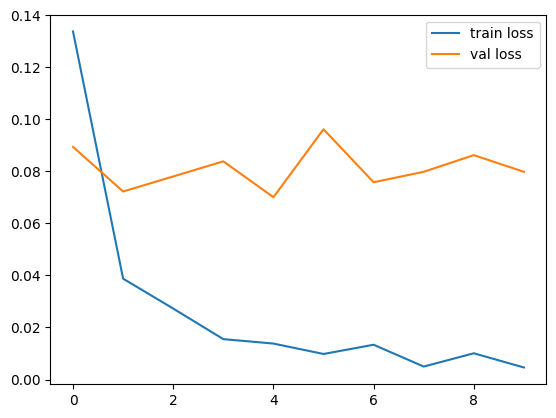

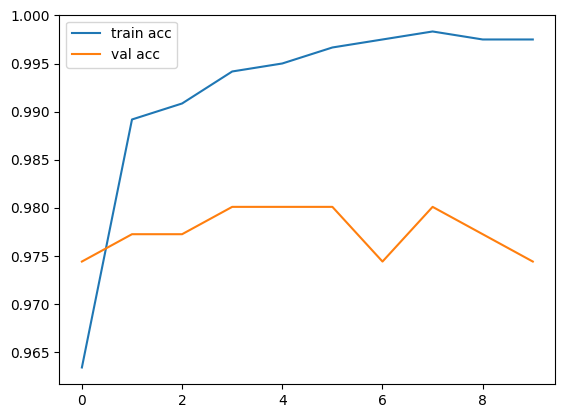

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_inceptionv3.history['loss'], label='train loss')
plt.plot(history_inceptionv3.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history_inceptionv3.history['accuracy'], label='train acc')
plt.plot(history_inceptionv3.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
base_model_densenet121 = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model_densenet121 = create_model(base_model_densenet121)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
history_densenet121= train_model(model_densenet121, train_generator, validation_generator)

Epoch 1/10
38/38 [==============================] - 37s 688ms/step - loss: 0.1154 - accuracy: 0.9601 - val_loss: 0.0788 - val_accuracy: 0.9801
Epoch 2/10
38/38 [==============================] - 20s 514ms/step - loss: 0.0334 - accuracy: 0.9892 - val_loss: 0.0631 - val_accuracy: 0.9801
Epoch 3/10
38/38 [==============================] - 21s 565ms/step - loss: 0.0317 - accuracy: 0.9875 - val_loss: 0.0684 - val_accuracy: 0.9801
Epoch 4/10
38/38 [==============================] - 20s 519ms/step - loss: 0.0165 - accuracy: 0.9950 - val_loss: 0.0576 - val_accuracy: 0.9830
Epoch 5/10
38/38 [==============================] - 20s 528ms/step - loss: 0.0108 - accuracy: 0.9958 - val_loss: 0.0688 - val_accuracy: 0.9801
Epoch 6/10
38/38 [==============================] - 21s 534ms/step - loss: 0.0132 - accuracy: 0.9950 - val_loss: 0.0660 - val_accuracy: 0.9801
Epoch 7/10
38/38 [==============================] - 23s 613ms/step - loss: 0.0111 - accuracy: 0.9950 - val_loss: 0.0502 - val_accuracy: 0.9858

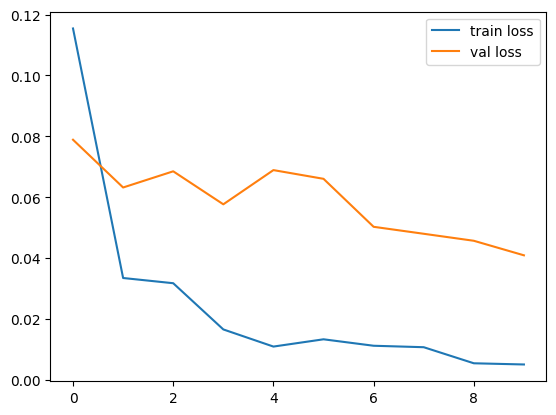

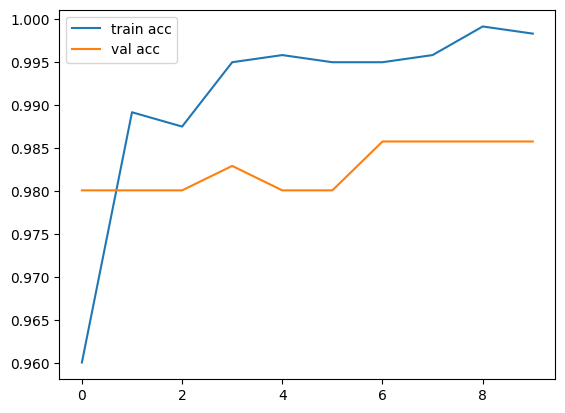

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# Plot the loss
plt.plot(history_densenet121.history['loss'], label='train loss')
plt.plot(history_densenet121.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Plot the accuracy
plt.plot(history_densenet121.history['accuracy'], label='train acc')
plt.plot(history_densenet121.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
 model_vgg16.save('spam_image_filter_model_vgg16.h5')
# model_vgg19.save('spam_image_filter_model_vgg19.h5')
# model_resnet50.save('spam_image_filter_model_resnet50.h5')
# model_inceptionv3.save('spam_image_filter_model_inceptionv3.h5')
# model_densenet121.save('spam_image_filter_model_densenet121.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
model = tf.keras.models.load_model('spam_image_filter_model_vgg19.h5')
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array
def predict_spam(image_path):
    processed_img = preprocess_image(image_path)
    prediction = model.predict(processed_img)
    return prediction[0][0]
uploaded_image_path = '/content/drive/MyDrive/spam image datset/ish dataset/test/SpamImages/FVFQv4gohy.jpg'
prediction_result = predict_spam(uploaded_image_path)
spam_threshold = 0.5

if prediction_result >= spam_threshold:
    print("The uploaded image is predicted as SPAM.")
else:
    print("The uploaded image is predicted as NOT SPAM.")


1/1 [==============================] - 0s 240ms/step
The uploaded image is predicted as SPAM.
